###  2018015027 김한탁  /  dataset : tips                                                                                                             

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


* total_bill: 식사 대금을 나타내는 연속형 변수로, 미국 달러로 표시됩니다. 식사 대금은 음식 및 음료의 총 비용을 나타냅니다.  
* tip: 팁의 양을 나타내는 연속형 변수로, 미국 달러로 표시됩니다. 이 값은 서비스 직원에게 주어진 팁의 양입니다.  
* sex: 고객의 성별을 나타내는 범주형 변수로, 'Male' (남성) 또는 'Female' (여성) 값 중 하나를 가집니다.  
* smoker: 흡연 여부를 나타내는 범주형 변수로, 'Yes' (흡연자) 또는 'No' (비흡연자) 값 중 하나를 가집니다.  
* day: 식사가 이루어진 요일을 나타내는 범주형 변수로, 'Thur' (목요일), 'Fri' (금요일), 'Sat' (토요일), 'Sun' (일요일) 값 중 하나를 가집니다.  
* time: 식사 시간을 나타내는 범주형 변수로, 'Lunch' (점심) 또는 'Dinner' (저녁) 값 중 하나를 가집니다.  
* size: 식사 파티의 크기를 나타내는 연속형 변수로, 고객 수를 나타냅니다.  

In [3]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['day'].unique())
print(data['time'].unique())
print(data['size'].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
[2 3 4 1 6 5]


In [4]:
data['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 목표: target(tip)의 형성에 변수들이 어떠한 영향을 미치는지 확인

### 1. Barplot

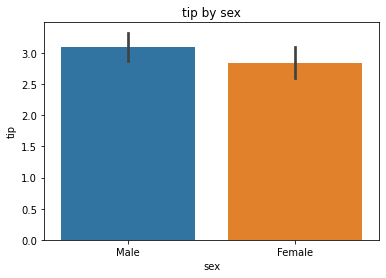

In [5]:
sns.barplot(x='sex', y='tip', data=data)
plt.title("tip by sex")
plt.show()

위의 barplot은 성별(sex)에 따른 tip의 평균을 확인할 수 있다.  
그래프 상의, 남성(Male) tip의 평균은 약 3.1정도를 가리키고, 여성(Female)의 tip 평균은 약 2.8정도를 가리킨다.  
막대 각각의 까만 선은 95% 신뢰구간이며, 각 성별의 팁의 100번 중 95번 정도가 각 막대의 까만선의 범위에 속한다는 것을 나타낸다.  
두 막대의 까만 선 범위가 서로 겹쳐 있는 것으로 보아, 성별에 따른 팁의 차이가 난다고 보기 어려울 수 있다.

### 2. Scatter plot

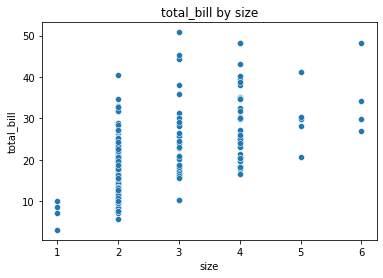

In [6]:
sns.scatterplot(x='size', y='total_bill', data=data )
plt.title("total_bill by size")
plt.show()

다음은 고객 규모(size)와 식사 대금(total_bill)에 대한 Scatterplot이다.  
고객 규모는 주로 2,3,4명으로 구성되어 있는 것을 확인할 수 있으며, 일반적으로 고객 규모가 클수록 식사 대금도 높다고 생각될 수 있다.   
그러나 일정 수준의 이상의 식사 대금을 확인하면, 고객 규모는 크게 관련이 없음을 알 수 있다.

### 3. Boxplot

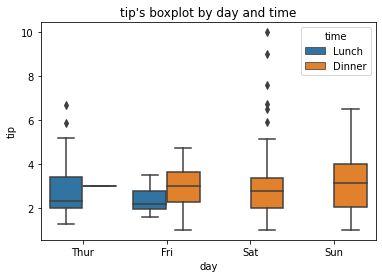

In [7]:
sns.boxplot(x = 'day', y='tip', data=data, hue='time' )
plt.title("tip's boxplot by day and time")
plt.show()

다음은 요일(day)에 따른 tip의 분포를 확인하는 Boxplot이다.  
Boxplot을 통해, 요일 변수에 목요일(Thur), 금요일(Fri), 토요일(Sat), 일요일(Sun)만 고려된 것을 알 수 있다.

1. 우선 Thur은, 주로 Lunch 고객이 대부분이며(Dinner-1팀), 중위수는 약 2.2달러이고, 고객들이 약1 ~ 5달러 사이의 팁을 소비하였다.      또한 두 명의 고객이 약 6, 7달러 정도의 확연히 차이날 수 있는 팁을 소비하였다.(이상치)  
2. Fri은 Lunch와 Dinner 고객이 모두 존재하며, Lunch의 중위수는 약 2달러이고, 고객들이 약1 ~ 3.7달러 사이의 팁을 소비하였다.   
   반면 Dinner는 중위수가 약 3달러로 컸고, 고객들이 약0.5 ~ 5달러의 비교적 넓은 범위의 팁을 소비하였다.  
   또한 두 시간대 모두 확연히 차이나는 팁을 소비한 고객은 확인되지 않았다.  
3. Sat은 Dineer 고객이 전부이며, 중위수는 약 2.8달러이고, 고객들이 약 0.5 ~ 5.3달러 사이의 팁을 소비하였다.  
   또한 여섯 명의 고객이 약 5.8 ~ 10달러 정도의 확연히 차이날 수 있는 팁을 소비하였다.(이상치) 
4. Sat과 마찬가지로, Sun은 Dinner 고객이 전부이며, 중위수는 약 3달러, 고객들은 약 0.5 ~ 7달러 사이의 팁을 소비하였다.  
   그러나 Sat과 다르게, Sun의 Dinner에서는 확연하게 차이나는 팁을 소비한 고객은 확인되지 않았다.

결론적으로, 요일에 따른 time(Lunch, Dinner) 고객의 차이는 있었으나, 이를 통해 tip의 분포의 차이나 뚜렷한 특징을 찾을 수 없었다.  

### 4. Vilolin plot

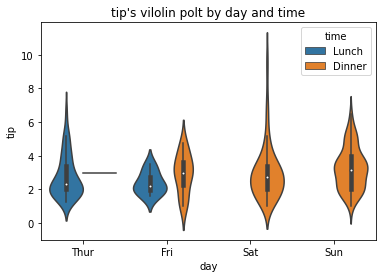

In [8]:
sns.violinplot(x = 'day', y='tip', data=data, hue='time' )
plt.title("tip's vilolin polt by day and time")
plt.show()

다음은 요일(day)에 따른 tip의 분포를 확인하는 Vilolinplot이다.  
Boxplot과 비슷하게 요일에 따른 tip의 분포를 확인할 수 있지만, 더하여 실제 tip이 어느 값에 많이 존재하는지 확인할 수 있다.
1. Thur의 경우, Lunch의 고객들은 약 2달러를 가장 많이 tip으로 소비했음을 알 수 있다.
2. Fri의 경우, Lunch의 고객들은 약 2달러, Dinner의 고객들은 약 3.3달러 정도를 가장 많이 tip으로 소비했음을 알 수 있다.
3. Sat의 경우, Dinner의 고객들은 약 2.8달러를 가장 많이 tip으로 소비했음을 알 수 있다.
4. Sun의 경우, Dinner의 고객들은 약 3.8달러를 가장 많이 tip으로 소비했음을 알 수 있다.  

### 5. Joint plot

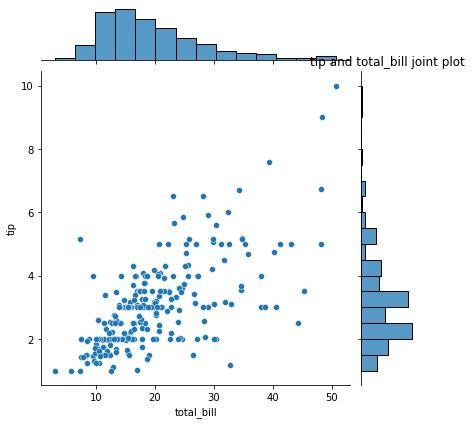

In [9]:
sns.jointplot(x='total_bill', y='tip', data=data)
plt.title("tip and total_bill joint plot")
plt.show()

다음은 식사 대금(total_bill)과 tip의 Joint plot으로, 두 변수의 범주별 빈도와, 상관성을 확인할 수 있다.  
고객들은 식사 대금으로 다양한 금액을 지불하였으나, 약 15 ~ 20달러을 가장 많이 사용하였고, 그보다 낮거나, 클수록 그 빈도가 작아짐을 확인할 수 있다.  
또한 tip에 대해, 다양한 범주가 존재하며, 주로 약 2 ~ 2.5, 3 ~ 3.5 달러를 팁으로 가장 많이 소비하는 것으로 확인되었다.  
마지막 상관관계에 대해서, 식사 대금을 기준으로 40달러 미만의 구간에서는 두 변수가 높은 (양의) 상관 관계를 띄는 듯하였으나, 40달러를 초과하는 구간에서는 일부 팁(이상치)을 제외하곤, 40달러 미만 구간의 팁과 큰 차이가 나지 않는 것으로 생각된다.  
이는 일반적으로 고객들이 식사 대금에 많은 금액을 지불할수록 많은 팁을 제공하나, 식사 대금에 지불하는 금액이 계속 커져도 팁은 일정 수준에 수렴한다는 것을 의미한다. 

### 6. stripplot

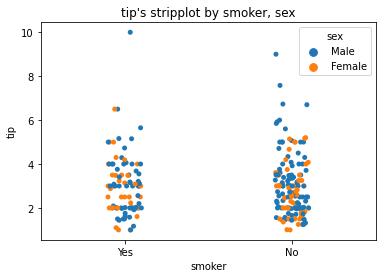

In [10]:
sns.stripplot(y ='tip', x='smoker', data=data, hue='sex')
plt.title("tip's stripplot by smoker, sex")
plt.show()

다음은 흡연 여부(smoker)에 따른 tip의 분포를 확인하기 위한 Stripplot이다.  
그래프를 통해, 흡연 여부와 성별(sex)은 크게 관련이 없는 것으로 보이며, 흡연 여부애 따라 tip의 분포 차이가 뚜렷하지 않은 것을 통해, 흡연 여부와 tip은 또한 크게 관련이 없을 것으로 판단된다.  
다만 흡연을 하지 않는 그룹(smoker-No)이 흡연을 하는 그룹(smoker-Yes)보다 데이터 포인트가 많은 것을 통해, 흡연을 하지 않는 고객이 tip을 소비할 확률이 높다고 생각될 수 있다.

### 7. Pointplot

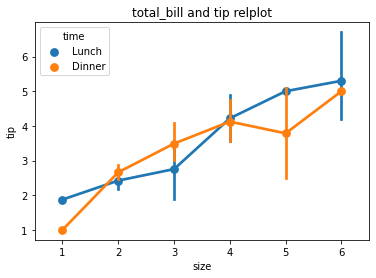

In [11]:
sns.pointplot(x='size', y='tip', hue='time', data=data)
plt.title("total_bill and tip relplot")
plt.show()

다음은 고객 규모(Size), 시간대(Lunch, Dinner) 별 tip의 차이를 알아보기 위한 Pointplot이다.  
그래프를 통해, 일반적으로 시간대와 관계없이 규모가 커질수록 tip의 point(평균,중심 경향)이 증가함을 알 수 있다.
고객 규모가 1,4,5,6의 경우는 Lunch의 tip의 평균이 크고, 2,3,6의 경우에는 Dinner의 tip의 평균이 크다는 것을 확인할 수 있다.  
다음으로 Lunch의 tip에 대해 고객 규모가 1,2,3,4,5명인 경우에는 비교적 일정한 수준(편차가 작은)인 반면, 6명인 경우 다양한 수준의 tip의 소비를 볼 수 있었다.  
추가로 Dinner는 고객 규모가 1,2,3,4,6명인 경우에 tip이 비교적 일정한 수준이었으나, 5명일 때 다양한 tip의 소비를 볼 수 있었다.